In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#import data into dataframe
df = pd.read_csv("C:\\Users\\faiza\\OneDrive\\Desktop\\CO2 Emissions_Canada.csv",encoding="ISO-8859-1")
df

,Make,Model,VehicleClass,EngineSize,Cylinders,Transmission,FuelType,FuelConsumptionCity,FuelConsumptionHwy,FuelConsumptionComb,FuelConsumptionComb.1,CO2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [17]:
#Let's select some features that we want to use for regression.
cdf = df[['EngineSize','Cylinders','FuelConsumptionCity','FuelConsumptionHwy','FuelConsumptionComb','CO2Emissions']]
cdf

,EngineSize,Cylinders,FuelConsumptionCity,FuelConsumptionHwy,FuelConsumptionComb,CO2Emissions
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,219
7381,2.0,4,11.2,8.3,9.9,232
7382,2.0,4,11.7,8.6,10.3,240
7383,2.0,4,11.2,8.3,9.9,232


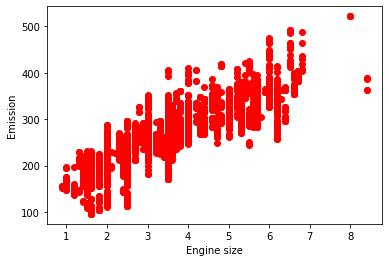

In [10]:
#Let's plot Emission values with respect to Engine size:
plt.scatter(cdf.EngineSize, cdf.CO2Emissions,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

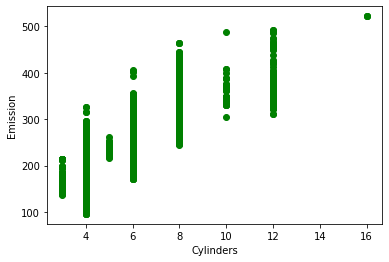

In [9]:
#Let's plot Emission values with respect to cylinders:
plt.scatter(cdf.Cylinders, cdf.CO2Emissions,  color='green')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

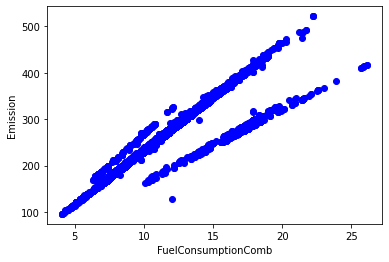

In [16]:
#Let's plot Emission values with respect to FuelConsumptionComb :
plt.scatter(cdf.FuelConsumptionComb, cdf.CO2Emissions,  color='blue')
plt.xlabel("FuelConsumptionComb")
plt.ylabel("Emission")
plt.show()

In [19]:
# Creating train and test dataset
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk] #true values
test = cdf[~msk] #false values

In [20]:
msk

array([ True,  True,  True, ...,  True,  True, False])

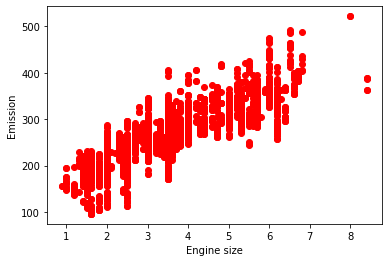

In [22]:
# plot Train data distribution 
plt.scatter(train.EngineSize, train.CO2Emissions,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

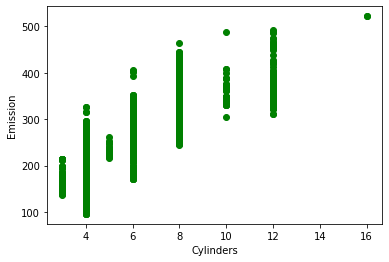

In [23]:
plt.scatter(train.Cylinders, train.CO2Emissions,  color='green')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

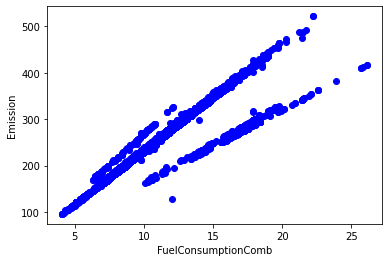

In [26]:
plt.scatter(train.FuelConsumptionComb, train.CO2Emissions,  color='blue')
plt.xlabel("FuelConsumptionComb")
plt.ylabel("Emission")
plt.show()

In [28]:
# creating Multiple Regression Model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['EngineSize','Cylinders','FuelConsumptionComb']]) # independent variables
y = np.asanyarray(train[['CO2Emissions']])   # dependent variable
regr.fit (x, y)    # traning the daataset with help of previous values
# The coefficients
print ('Coefficients: ', regr.coef_)  #coeffcient = tita0,tita1,tita2......

Coefficients:  [[ 5.11244383  6.42539277 13.54259131]]


In [34]:
#predicting the values

x_test = np.asanyarray(test[['EngineSize','Cylinders','FuelConsumptionComb']])
y_test = np.asanyarray(test[['CO2Emissions']])

prediction = regr.predict(x_test)

print("Residual sum of squares: %.2f"
      % np.mean((prediction - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 431.02
Variance score: 0.87


In [35]:
prediction

array([[333.71197844],
       [211.597002  ],
       [221.07681592],
       ...,
       [207.53422461],
       [212.95126113],
       [230.55662984]])

In [36]:
y_test

array([[354],
       [214],
       [230],
       ...,
       [210],
       [219],
       [248]], dtype=int64)